In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
ca_housing = fetch_california_housing()
X, y = ca_housing.data, ca_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [6]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MAE: 0.91
MSE: 1.31
R2: -0.00
Accuracy: -0.00


In [9]:
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

y_pred2 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MAE: 0.62
MSE: 0.68
R2: 0.48


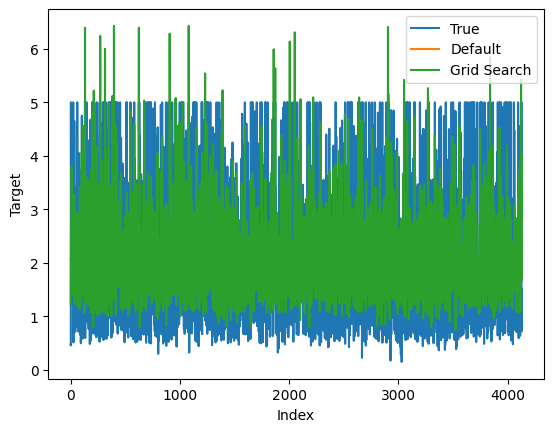

In [10]:
# plot default model and grid search model by accuracy 
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(y_test)), y_test, label='True')
plt.plot(np.arange(len(y_pred)), y_pred, label='Default')
plt.plot(np.arange(len(y_pred2)), y_pred2, label='Grid Search')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()